In [1]:
import scipy.stats
import numpy as np
import scipy as sp
import pandas as pd
import  matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
plt.rc("font", family="Malgun Gothic")
mpl.rcParams['axes.unicode_minus'] = False

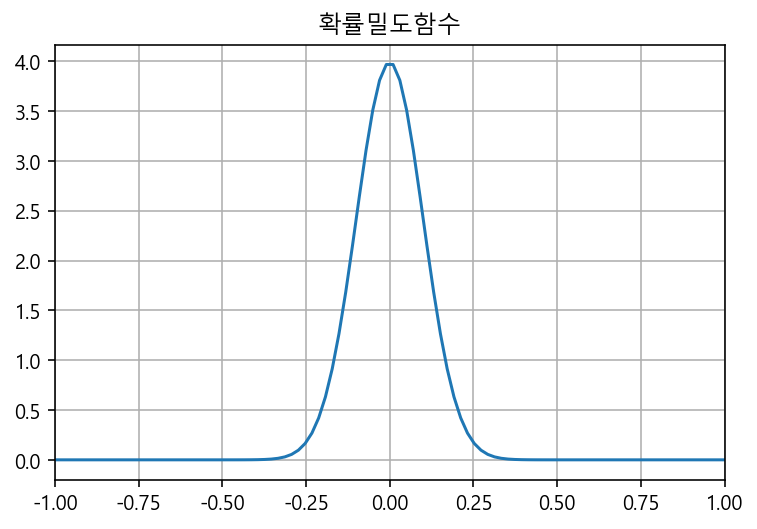

In [2]:
rv = sp.stats.norm(loc=0, scale=0.1)   # 정규분포생성
xx = np.linspace(-1,1,100)
pdf = rv.pdf(xx)
plt.plot(xx,pdf)
plt.title('확률밀도함수')
plt.xlim((-1,1))
plt.grid(True)
plt.show()

In [3]:
x_bar=rv.rvs(size=1000)

In [4]:
np.mean(x_bar), np.var(x_bar, ddof=1)

(-0.0005293856950831266, 0.010319391809925305)

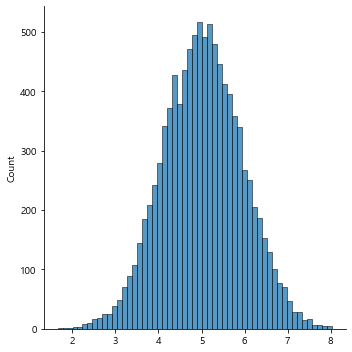

In [5]:
x = sp.stats.uniform().rvs((10, 10000))
s = x.sum(axis=0)
sns.displot(s)
plt.show()
    

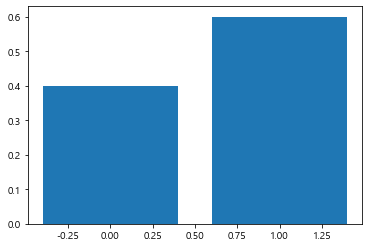

In [6]:
# 확률질량
mu = 0.6
rv = sp.stats.bernoulli(mu)
xx=[0,1]
plt.bar(xx, rv.pmf(xx))
plt.show()

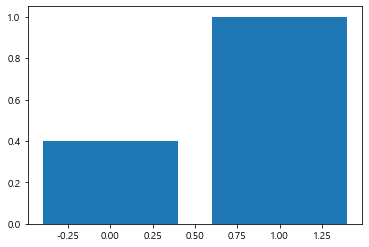

In [7]:
# 누적분포
plt.bar(xx, rv.cdf(xx))
plt.show()

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


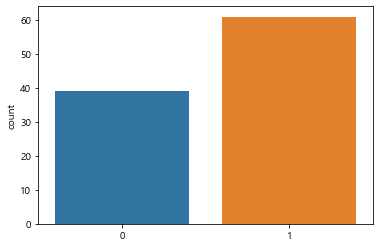

In [8]:
x = rv.rvs(100)
sns.countplot(x)
plt.show()

In [9]:
y = np.bincount(x, minlength=2) / float(len(x))

df = pd.DataFrame({'이론' : rv.pmf(xx), '시뮬레이션': y})
df.index = [0, 1]
df

,이론,시뮬레이션
0,0.4,0.39
1,0.6,0.61


In [10]:
df2 = df.stack().reset_index()
df2.columns = ['표본값', '유형', '비율']
df2

,표본값,유형,비율
0,0,이론,0.40
1,0,시뮬레이션,0.39
2,1,이론,0.60
3,1,시뮬레이션,0.61


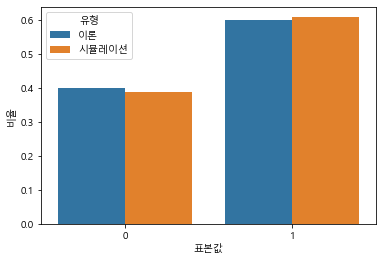

In [11]:
sns.barplot(x='표본값', y='비율', hue='유형', data=df2)
plt.show()


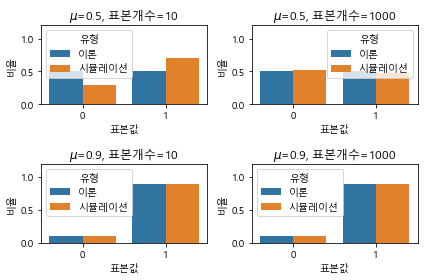

In [12]:
def plot_bernulli(mu, M):
    rv = sp.stats.bernoulli(mu)
    x = rv.rvs(M, random_state=0)
    y = np.bincount(x, minlength=2) / float(len(x))
    xx =[0,1]
    df =pd.DataFrame({'이론': rv.pmf(xx), '시뮬레이션': y})
    df.index=[0,1]
    df2 = df.stack().reset_index()
    df2.columns = ['표본값', '유형', '비율']
    sns.barplot(x='표본값', y='비율', hue='유형', data=df2)
    plt.title('$\mu$={}, 표본개수={}'.format(mu, M))
    plt.ylim(0, 1.2)
    
plt.subplot(221)
plot_bernulli(0.5, 10)
plt.subplot(222)
plot_bernulli(0.5, 1000)
plt.subplot(223)
plot_bernulli(0.9, 10)
plt.subplot(224)
plot_bernulli(0.9, 1000)
plt.tight_layout()
plt.show()

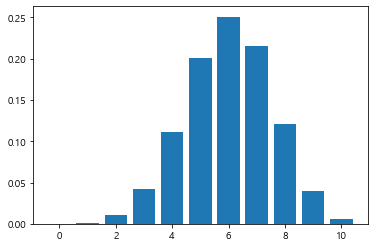

In [13]:
N = 10
mu = 0.6
rv = sp.stats.binom(N, mu)
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align='center')
plt.show()

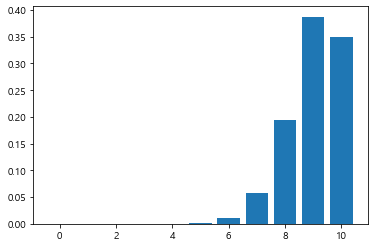

In [14]:
N = 10
mu = 0.9
rv = sp.stats.binom(N, mu)
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align='center')
plt.show()

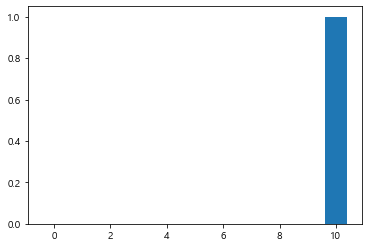

In [15]:
N = 10
mu = 1
rv = sp.stats.binom(N, mu)
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align='center')
plt.show()

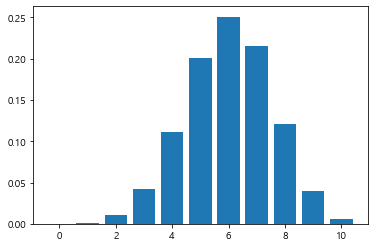

In [16]:
N = 10
mu = 0.6
rv = sp.stats.binom(N, mu)
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align='center')
plt.show()

In [17]:
np.random.seed(0)
x = rv.rvs(100)
x

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


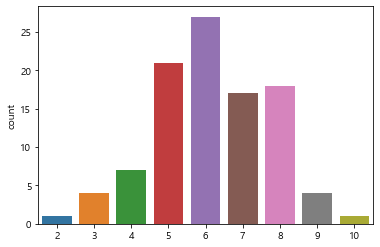

In [18]:
sns.countplot(x)
plt.show()

In [19]:
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(1, mu)

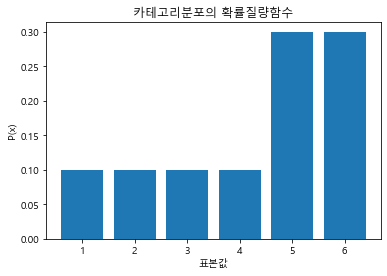

In [20]:
xx = np.arange(1, 7)
xx_ohe = pd.get_dummies(xx)

plt.bar(xx, rv.pmf(xx_ohe.values))
plt.ylabel('P(x)')
plt.xlabel('표본값')
plt.title('카테고리분포의 확률질량함수')
plt.show()

In [21]:
np.random.seed(1)
X = rv.rvs(100)

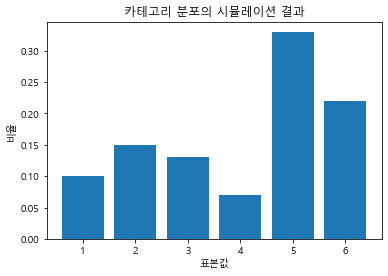

In [22]:
y = X.sum(axis=0) / float(len(X))
plt.bar(np.arange(1, 7), y)
plt.title('카테고리 분포의 시뮬레이션 결과')
plt.xlabel('표본값')
plt.ylabel('비율')
plt.show()

In [23]:
def get_category(mu, N):
    rv = sp.stats.multinomial(1, mu)
    xx = np.arange(1, len(mu)+1)
    xx_ohe = pd.get_dummies(xx)
    
    # 표본추출
    X = rv.rvs(N)
    y = X.sum(axis=0) / float(len(X))
    
    # 비교
    df = pd.DataFrame({'이론': rv.pmf(xx_ohe.values), '시뮬레이션': y}, index=xx).stack()
    df = df.reset_index()
    df.columns = ['표본값', '유형', '비율']
    df.pivot('표본값', '유형', '비율')
    
    sns.barplot(x='표본값', y='비율', hue='유형', data=df)
    plt.title(f"카테고리분포의 이론적분포 와 시뮬레이션분포 비교{N}회 시행")
    plt.show()

In [24]:
## practice 1
mu1 = [0.25, 0.25, 0.25, 0.25]
mu2 = [0.3, 0.3, 0.2, 0.2]

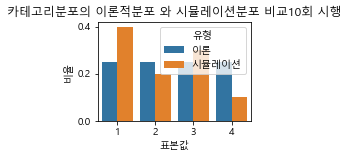

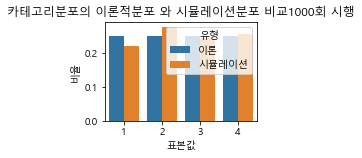

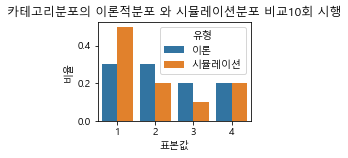

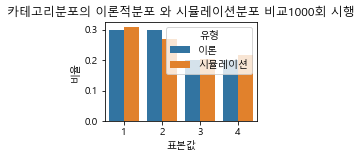

<Figure size 432x288 with 0 Axes>

In [25]:
plt.subplot(221)
get_category(mu1, 10)
plt.subplot(222)
get_category(mu1, 1000)
plt.subplot(223)
get_category(mu2, 10)
plt.subplot(224)
get_category(mu2, 1000)
plt.tight_layout()
plt.show()

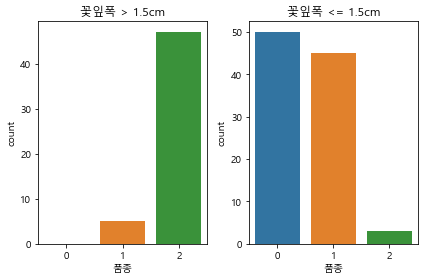

In [26]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['품종'] = pd.Series(iris.target, dtype='category')

df1 = df[df['petal width (cm)'] > 1.5]
df2 = df[df['petal width (cm)'] <= 1.5]

fig, ax = plt.subplots(1,2)
sns.countplot(x='품종', data=df1, ax=ax[0]).set_title('꽃잎폭 > 1.5cm')
sns.countplot(x='품종', data=df2, ax=ax[1]).set_title('꽃잎폭 <= 1.5cm')
plt.tight_layout()
plt.show()

In [27]:
N = 30
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(N, mu)
np.random.seed(0)
X = rv.rvs(100)
X[:3]

array([[ 3,  4,  3,  3,  8,  9],
       [ 3,  3,  5,  6,  6,  7],
       [ 4,  3,  3,  5,  5, 10]])

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packa

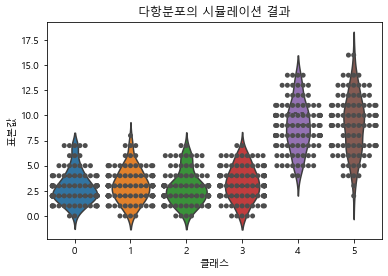

In [28]:
df = pd.DataFrame(X).stack().reset_index()
df.columns = ['시도', '클래스', '표본값']

sns.violinplot(x='클래스', y='표본값', data=df, inner='quartile')
sns.swarmplot(x='클래스', y='표본값', data=df, color='.3')
plt.title('다항분포의 시뮬레이션 결과')
plt.show()

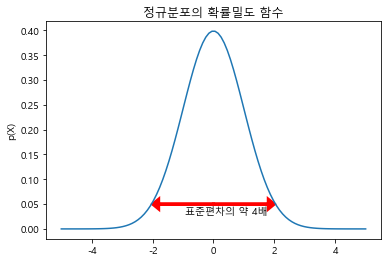

In [29]:
# 정규분포
mu = 0
std = 1
rv = sp.stats.norm(mu, std)

xx = np.linspace(-5,5,100)
plt.plot(xx,rv.pdf(xx))
plt.arrow(0, 0.05, 2, 0, lw=3, color='r',
          head_width=0.02, head_length=0.2, length_includes_head=True)
plt.arrow(0, 0.05, -2, 0, lw=3, color='r',
          head_width=0.02, head_length=0.2, length_includes_head=True)
plt.text(-0.95, 0.03, '표준편차의 약 4배')
plt.ylabel('p(X)')
plt.title('정규분포의 확률밀도 함수')
plt.show()

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


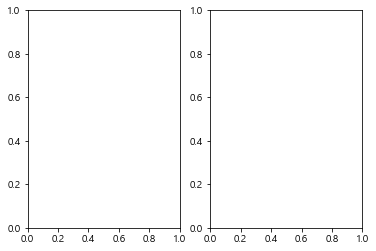

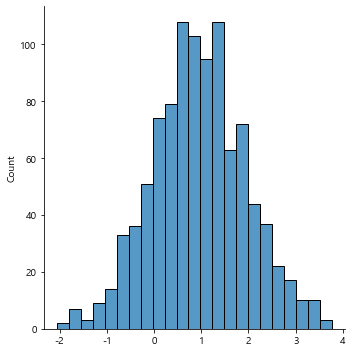

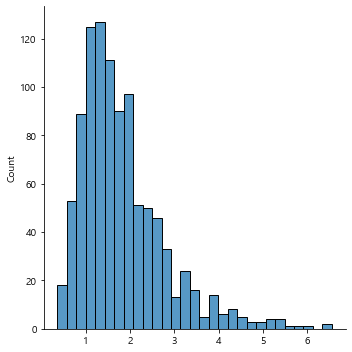

In [58]:
np.random.seed(0)
mu = 1
rv = sp.stats.norm(loc=mu)
x1 = rv.rvs(1000)
s = 0.5
x2 = np.exp(s * x1)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
sns.displot(x1, kde=False, ax=ax1)
ax[0].set_title('정규분포')

sns.displot(x2, kde=False, ax=ax2)
ax[1].set_title('로그정규분포')

plt.tight_layout()
plt.show()

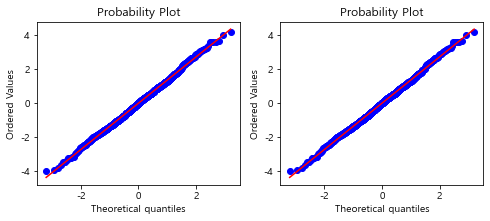

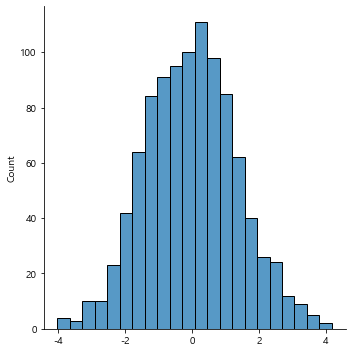

In [77]:
N = 2
M = 1000
np.random.seed(0)
x = np.random.normal(size=(N,M))
s = x.sum(axis=0)

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sp.stats.probplot(s, plot=plt)
plt.subplot(1,2,2)
sp.stats.probplot(s, plot=plt)
sns.displot(s)
plt.show()